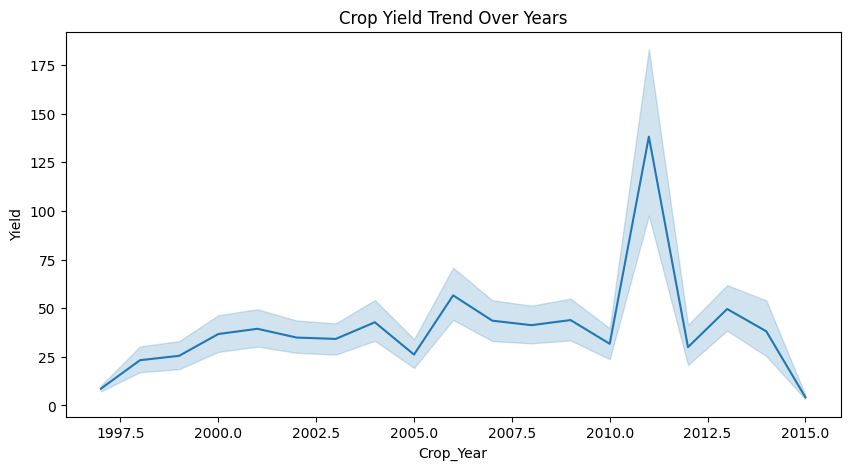

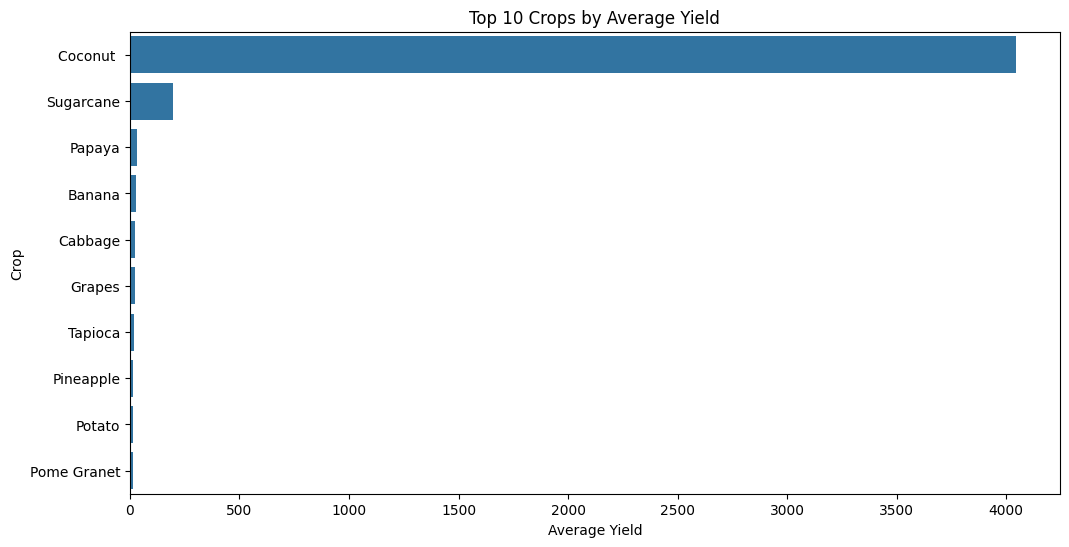

Mean Absolute Error: 52.07803567069294
R-squared: 0.39376351373275076


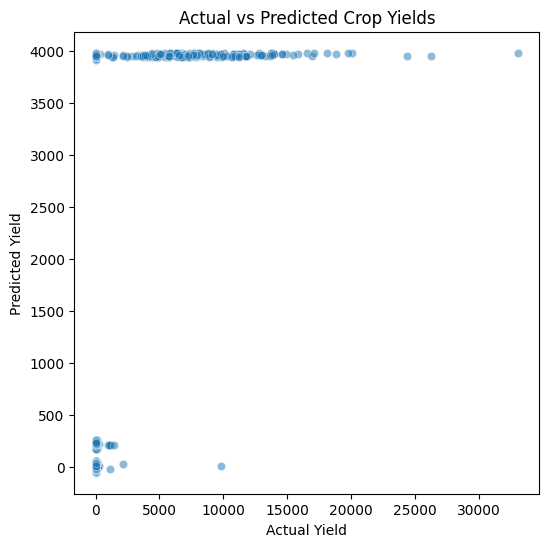

In [2]:
# Step 1: Import necessary libraries

import pandas as pd       # for handling datasets
import numpy as np        # for numerical operations
import matplotlib.pyplot as plt   # for visualizations
import seaborn as sns     # for prettier visualizations

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Show plots in notebook
%matplotlib inline
# Step 2: Load dataset

data = pd.read_csv('crop_production.csv')
data.head()
# Step 3: Data Cleaning

# Drop rows with missing production or area
data = data.dropna(subset=['Production', 'Area'])

# Calculate yield
data['Yield'] = data['Production'] / data['Area']

# Keep only useful columns
data = data[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Yield']]

# Drop rows with zero or invalid area/yield
data = data[(data['Area'] > 0) & (data['Yield'] > 0)]

data.head()
# Step 4: Visualization

plt.figure(figsize=(10,5))
sns.lineplot(x='Crop_Year', y='Yield', data=data)
plt.title('Crop Yield Trend Over Years')
plt.show()

plt.figure(figsize=(12,6))
top_crops = data.groupby('Crop')['Yield'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_crops.values, y=top_crops.index)
plt.title('Top 10 Crops by Average Yield')
plt.xlabel('Average Yield')
plt.show()
# Step 5: Model Training

# Convert categorical columns to numeric (for ML)
data = pd.get_dummies(data, columns=['Season', 'Crop'], drop_first=True)

# Define features (X) and target (y)
X = data.drop(['Yield', 'State_Name', 'District_Name'], axis=1)
y = data['Yield']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Step 6: Model Evaluation

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Crop Yields")
plt.show()
